### Problem Statement

You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [2]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time

### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [3]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv("datasets\\milk_quality_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.sample(7)

(1059, 8)


,ph,temperature,taste,odor,fat,turbidity,colour,grade
346,9.0,43,1,0,1,1,250,low
842,6.8,45,1,1,1,1,245,high
293,6.7,41,1,0,0,0,247,medium
761,6.7,45,1,1,0,0,247,medium
465,6.7,45,1,1,0,0,247,medium
834,6.5,38,1,0,0,0,255,medium
344,6.7,38,1,0,1,0,255,high


In [4]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [5]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
df["grade"] = df["grade"].map({"low" : 0, "medium" : 1, "high" : 2})
df.head(1)

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2


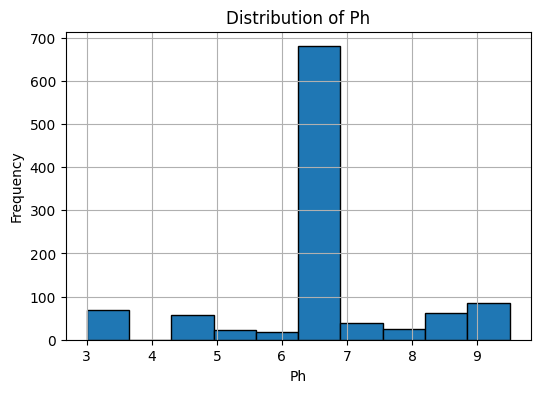

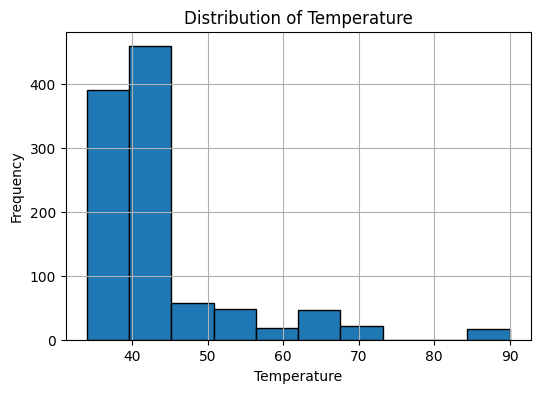

In [23]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms
key_features = ["ph", "temperature"]

for k in key_features:
    plt.figure(figsize=(6,4))
    df[k].plot(kind="hist", edgecolor="black")
    plt.xlabel(k.capitalize())
    plt.title(f"Distribution of {k.capitalize()}")
    plt.grid(True)
    plt.show()


### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [25]:
# Step 1: Select the features and target variable for modeling
X = df.drop("grade", axis=1)
y = df["grade"]


# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=1337)


### Simple Logistic Regression

In [36]:
# Step 3: Initialize and train a Logistic Regression model using the training data
start = time.time()
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)
end = time.time()

# Step 4: Print the model's accuracy score on test data.
print("training acc:", model_lr.score(X_train, y_train))
print("test acc: ", model_lr.score(X_test, y_test))
print("time: ", end - start)

scores = cross_val_score(model_lr, X, y, cv=5)
print("Actual Scores: ", scores)
print("Scores diff: ", scores.max() - scores.min())

training acc: 0.8502024291497976
test acc:  0.8522012578616353
time:  0.46846675872802734
Actual Scores:  [0.8490566  0.86792453 0.85377358 0.84433962 0.87677725]
Scores diff:  0.03243762854332466


### Decision Tree

In [37]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data
start = time.time()
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
end = time.time()

# Step 6: Print the model's accuracy score on test data.
print("training acc:", model_dt.score(X_train, y_train))
print("test acc: ", model_dt.score(X_test, y_test))
print("time: ", end - start)

scores = cross_val_score(model_dt, X, y, cv=5)
print("Actual Scores: ", scores)
print("Scores diff: ", scores.max() - scores.min())

training acc: 1.0
test acc:  0.9937106918238994
time:  0.0020012855529785156
Actual Scores:  [0.98113208 1.         1.         1.         0.98578199]
Scores diff:  0.018867924528301883


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [38]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
start = time.time()
model_gb = GradientBoostingClassifier(n_estimators=50)
model_gb.fit(X_train, y_train)
end = time.time()

# Step 2: Print the model's accuracy score
print("training acc:", model_gb.score(X_train, y_train))
print("test acc: ", model_gb.score(X_test, y_test))
print("time: ", end - start)

scores = cross_val_score(model_gb, X, y, cv=5)
print("Actual Scores: ", scores)
print("Scores diff: ", scores.max() - scores.min())

training acc: 0.9986504723346828
test acc:  0.9937106918238994
time:  0.1361241340637207
Actual Scores:  [0.98584906 1.         1.         1.         0.99052133]
Scores diff:  0.014150943396226467


### XGB Model

In [39]:
# Step 3: Initialize and train an XGBoost Classifier with 50 estimators using the training data
start = time.time()
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
end = time.time()

# Step 4: Print the model's accuracy score
print("training acc:", model_xgb.score(X_train, y_train))
print("test acc: ", model_xgb.score(X_test, y_test))
print("time: ", end - start)

scores = cross_val_score(model_xgb, X, y, cv=5)
print("Actual Scores: ", scores)
print("Scores diff: ", scores.max() - scores.min())

training acc: 1.0
test acc:  0.9968553459119497
time:  0.22498703002929688
Actual Scores:  [0.98113208 1.         1.         1.         0.99052133]
Scores diff:  0.018867924528301883


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [42]:
# Step 1: Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
start = time.time()
model_xgb_ = XGBClassifier(n_estimators=100, max_depth = 5, learning_rate = 0.1, colsample_bytree=0.5)
model_xgb_.fit(X_train, y_train)
end = time.time()

# Step 2: Print the model's accuracy score
print("training acc:", model_xgb_.score(X_train, y_train))
print("test acc: ", model_xgb_.score(X_test, y_test))
print("time: ", end - start)

scores = cross_val_score(model_xgb_, X, y, cv=5)
print("Actual Scores: ", scores)
print("Scores diff: ", scores.max() - scores.min())

y_pred = model_xgb_.predict(X_test)

training acc: 1.0
test acc:  1.0
time:  0.07706999778747559
Actual Scores:  [0.99528302 1.         1.         1.         0.99052133]
Scores diff:  0.009478672985781977


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00        78

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



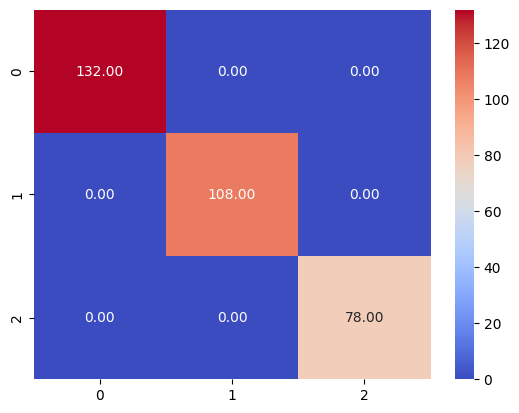

In [43]:
# Step 3: Print the classification report and confusion matrix for the model
print(classification_report(y_pred=y_pred, y_true=y_test))

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

sns.heatmap(cm, fmt=".2f", cmap='coolwarm', annot=True)
plt.show()
